<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h4 style="color:#303030"> Python for Data Science, Homework, template: </h4> </center>
<center> <h1 style="color:#303030">Breast Cancer Selection</h1> </center>
<p style="margin-bottom:1cm;"></p>
<center style="color:#303030"><h4>Propulsion Academy, 2021</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>Goal:</strong> Practice binary classification on Breast Cancer data</p>
        <strong> Sections:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href="#SU">Set Up </a> </li>
            <li> <a style="color:#303030" href="#P1">Exploratory Data Analysis</a></li>
            <li> <a style="color:#303030" href="#P2">Modeling</a></li>
        </ol>
        <strong>Topics Trained:</strong> Binary Classification.
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/" title="momentum"> SIT Introduction to Data Science</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/intro-2-ds-materials/weeks/week2/day1/index.html" title="momentum">Week 2 Day 1, Applied Machine Learning</a>|
        <a style="color:#00BAE5" href="https://colab.research.google.com/drive/17X_OTM8Zqg-r4XEakCxwU6VN1OsJpHh7?usp=sharing" title="momentum"> Assignment, Classification of breast cancer cells</a>
</strong></nav>

<a id='SU' name="SU"></a>
## [Set up](#P0)

**Package install**

In [1]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn==0.12.5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (8,508 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (T

In [2]:
!pip install joblib

In [3]:
!pip install pipelineprofiler

     |████████████████████████████████| 880kB 10.8MB/s 


In [4]:
!pip install shap

     |████████████████████████████████| 358kB 11.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=2fa96b7a9e51b9eeb13b8737df87e18a572796c59e31d56d1570a7a602610d58
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 11.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [10]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [77]:
!sudo apt-get install cookiecutter
!pip install gdown
!pip install dvc
!pip install 'dvc[gdrive]'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  javascript-common libjs-jquery libjs-sphinxdoc libjs-underscore python-arrow
  python-asn1crypto python-binaryornot python-certifi python-cffi-backend
  python-chardet python-click python-colorama python-configparser
  python-cookiecutter python-cryptography python-dateutil python-enum34
  python-future python-idna python-ipaddress python-jinja2 python-jinja2-time
  python-markupsafe python-openssl python-pkg-resources python-requests
  python-ruamel.yaml python-six python-urllib3 python-whichcraft python-yaml
Suggested packages:
  python-cookiecutter-doc apache2 | lighttpd | httpd python-arrow-doc
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-future-doc python-jinja2-doc python-openssl-doc python-openssl-dbg
  python-setuptools python-socks python-ntlm
The following NEW packages will be installed:
  co

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 3.2MB 15.2MB/s 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly
plotly.__version__

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import logging
import joblib

In [64]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn import preprocessing


In [3]:
import autosklearn.classification
import PipelineProfiler
import datetime

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [4]:
import shap

Connect to your Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
data_path = "/content/drive/MyDrive/Introduction2DataScience/w2d2/data/"


In [15]:
model_path = "/content/drive/MyDrive/Introduction2DataScience/w2d2/model/"

In [8]:
timestr =  str(datetime.datetime.now()).replace(' ','_')


In [19]:
logging.basicConfig(filename = f'{model_path}log_{timestr}.log' , level = logging.INFO)

In [10]:
pd.set_option('display.max_rows', 20)

In [11]:
set_config(display='diagram')

In [12]:
%matplotlib inline

_Your Comments here_

### Data Structure and types

**Load the csv file as a DataFrame using Pandas**

In [17]:
dataset = pd.read_csv(f'{data_path}data-breast-cancer.csv')

In [20]:
logging.info("Read the dataset")

INFO:root:Read the dataset


Now we separate the categories

In [21]:
categories = ['diagnosis']

In [22]:
X = dataset.drop(categories , axis = 1)
y = dataset[categories]

num_variables = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


_Your Comments here_

We now can do the test:train split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, # original dataframe to be split
                                                     y,
                                                     test_size=0.2, # proportion of the rows to put in the test set
                                                     stratify=y,
                                                     random_state=42) # for reproducibility (see explanation below)


In [24]:
logging.info("Successfully divided data into training and testing set")

INFO:root:Successfully divided data into training and testing set


### Pipeline Definition

In [25]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                      ('scaler', StandardScaler())])

In [26]:
ohe_transformer = OneHotEncoder(handle_unknown='ignore')

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_variables)
        ])

In [28]:
classification_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('classifier', LogisticRegression())])

In [29]:
classification_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension...
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst', ...])])),
                ('classifier', LogisticRegression())])

In [30]:
logging.info("Model prepared")

INFO:root:Model prepared


_Your Comments here_

### Model Training

In [31]:
classification_model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension...
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst', ...])])),
                ('classifier', LogisticRegression())])

In [32]:
logging.info('model fitted...')

INFO:root:model fitted...


In [33]:
col_names = num_variables.copy()


In [34]:
X_train_encoded = pd.DataFrame(classification_model['preprocessor'].transform(X_train), columns=col_names)

Encode feature 'diagnosis' with label encoder

In [45]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_train_encoded = le.transform(y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [46]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60,
    per_run_time_limit=30,
)


In [47]:
automl.fit(X_train_encoded, y_train_encoded)

[WARNING] [2021-04-20 16:44:17,039:Client-AutoML(1):a4c51764-a1f7-11eb-835c-0242ac1c0002] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=60)

In [38]:
logging.info('automl fitted...')

In [48]:
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.

In [51]:
logging.info("Model successfully trained...")

Now, we save the trained model using joblib.

In [54]:
joblib.dump(automl , f'{model_path}model{timestr}.pkl')

['/content/drive/MyDrive/Introduction2DataScience/w2d2/model/model2021-04-20_16:29:21.266502.pkl']

In [56]:
logging.info(f'Model saved successfully to {model_path} at {timestr}')

### Model Evaluation

In [57]:
X_test_encoded = pd.DataFrame(classification_model['preprocessor'].transform(X_test), columns=col_names)

In [58]:
y_pred = automl.predict(X_test_encoded)

In [59]:
y_test_encoded = le.transform(y_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [66]:
logging.info(f"Mean Squared Error is {mean_squared_error(y_test_encoded, y_pred)}, \n R2 score is {automl.score(X_test_encoded, y_test_encoded)}")

In [60]:
confusion_matrix(y_test_encoded,y_pred)

array([[72,  0],
       [ 1, 41]])

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,y_pred))

In [68]:
explainer = shap.KernelExplainer(model = automl.predict, data = X_test_encoded.iloc[:50, :], link = "identity")

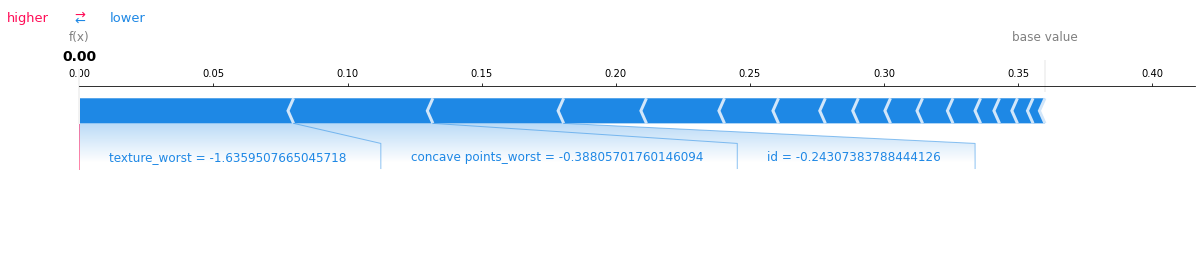

In [76]:
# Set the index of shap
X_idx = 0
shap_value_single = explainer.shap_values(X = X_test_encoded.iloc[X_idx:X_idx+1,:], nsamples = 100)
X_test.iloc[X_idx:X_idx+1,:]
# print the visualization 
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values = shap_value_single,
                features = X_test_encoded.iloc[X_idx:X_idx+1,:], show=False,
                matplotlib=True
                )
plt.savefig(f"{model_path}model_shap{timestr}.png")
logging.info(f" Saved Shap as {model_path}model_shap{timestr}.png")

In [70]:
shap_values = explainer.shap_values(X = X_test_encoded.iloc[0:50,:], nsamples = 100)

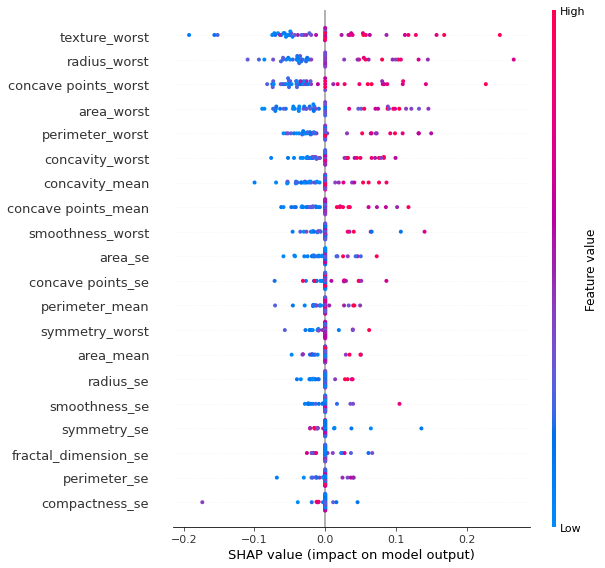

In [74]:
#print summary
shap.initjs()
fig = shap.summary_plot(shap_values = shap_values,
                  features = X_test_encoded.iloc[0:50,:], show=False
                  )
plt.savefig(f"{model_path}shap_summary_{timestr}.png")
logging.info(f"Shapley summary saved as {model_path}shap_summary_{timestr}.png")

In [ ]:
logging.info("Model evaluated")

# Create a cookiecutter data science project directory in your google drive and track its evolution using git

Change directory

In [79]:
%cd /content/drive/MyDrive/Introduction2DataScience/w2d2

/content/drive/MyDrive/Introduction2DataScience/w2d2


In [80]:
!cookiecutter https://github.com/drivendata/cookiecutter-data-science

project_name [project_name]: w2d2_assignment
repo_name [w2d2_assignment]: 
author_name [Your name (or your organization/company/team)]: Agbey
description [A short description of the project.]: Breast Cancer Classification
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 (1, 2, 3) [1]: 1
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 (1, 2) [1]: 


*** DEPRECATION WARNING ***

Cookiecutter data science is moving to v2 soon, which will entail using
the command `ccds ...` rather than `cookiecutter ...`. The cookiecutter command
will continue to work, and this version of the template will still be available.
To use the legacy template, you will need to explicitly use `-c v1` to select it.

Please update any scripts/automation you have to append the `-c v1` option,
which is available now.

For example:
    cookiecutter -c v1 h

Check the project structure

In [82]:
%cd w2d2_assignment/
!ls

/content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment
data	 Makefile   README.md	requirements.txt  test_environment.py
docs	 models     references	setup.py	  tox.ini
LICENSE  notebooks  reports	src


## Track Code Evolution using Git

In [83]:
!git init

Initialized empty Git repository in /content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment/.git/


In [84]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.gitignore
	LICENSE
	Makefile
	README.md
	docs/
	models/
	notebooks/
	references/
	reports/
	requirements.txt
	setup.py
	src/
	test_environment.py
	tox.ini

nothing added to commit but untracked files present (use "git add" to track)


In [85]:
!git add .

In [86]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   .gitignore
	new file:   LICENSE
	new file:   Makefile
	new file:   README.md
	new file:   docs/Makefile
	new file:   docs/commands.rst
	new file:   docs/conf.py
	new file:   docs/getting-started.rst
	new file:   docs/index.rst
	new file:   docs/make.bat
	new file:   models/.gitkeep
	new file:   notebooks/.gitkeep
	new file:   references/.gitkeep
	new file:   reports/.gitkeep
	new file:   reports/figures/.gitkeep
	new file:   requirements.txt
	new file:   setup.py
	new file:   src/__init__.py
	new file:   src/data/.gitkeep
	new file:   src/data/__init__.py
	new file:   src/data/make_dataset.py
	new file:   src/features/.gitkeep
	new file:   src/features/__init__.py
	new file:   src/features/build_features.py
	new file:   src/models/.gitkeep
	new file:   src/models/__init__.py
	new file:   src/models/predict_model.py
	new file:   src/models/train_model.py
	new file:   s

In [88]:
!git config --global user.email "dnewlife0@gmail.com"
!git config --global user.name "DSGroup"

In [90]:
!git commit -m "adding cookiecutter project"

[master (root-commit) 4d00810] adding cookiecutter project
 33 files changed, 1005 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 LICENSE
 create mode 100644 Makefile
 create mode 100644 README.md
 create mode 100644 docs/Makefile
 create mode 100644 docs/commands.rst
 create mode 100644 docs/conf.py
 create mode 100644 docs/getting-started.rst
 create mode 100644 docs/index.rst
 create mode 100644 docs/make.bat
 create mode 100644 models/.gitkeep
 create mode 100644 notebooks/.gitkeep
 create mode 100644 references/.gitkeep
 create mode 100644 reports/.gitkeep
 create mode 100644 reports/figures/.gitkeep
 create mode 100644 requirements.txt
 create mode 100644 setup.py
 create mode 100644 src/__init__.py
 create mode 100644 src/data/.gitkeep
 create mode 100644 src/data/__init__.py
 create mode 100644 src/data/make_dataset.py
 create mode 100644 src/features/.gitkeep
 create mode 100644 src/features/__init__.py
 create mode 100644 src/features/build_features.py
 crea

## Place the raw data and the machine learning notebooks in the dedicated folders

In [113]:
%cd data/raw

/content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment/data/raw


In [114]:

!gdown https://drive.google.com/uc?id=1O-7VpweD_Ao8xGijJ7-9pd28MZLSoLqD

Downloading...
From: https://drive.google.com/uc?id=1O-7VpweD_Ao8xGijJ7-9pd28MZLSoLqD
To: /content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment/data/raw/data-breast-cancer.csv
100% 125k/125k [00:00<00:00, 18.5MB/s]


In [115]:
%cd ../../notebooks/

/content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment/notebooks


In [110]:
!gdown https://drive.google.com/uc?id=1cbUK6zxWvDfXDPCUp3HAsv-Rp9ITzQB2
#https://colab.research.google.com/drive/1cbUK6zxWvDfXDPCUp3HAsv-Rp9ITzQB2?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1cbUK6zxWvDfXDPCUp3HAsv-Rp9ITzQB2
To: /content/drive/My Drive/Introduction2DataScience/w2d2/w2d2_assignment/notebooks/Copy of Copy of Assignment-4 (DS).ipynb
100% 1.05M/1.05M [00:00<00:00, 32.4MB/s]


--------------
# End of This Notebook